In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
#import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel ('dataset2.xlsx')
df

,Unnamed: 0,hardness,tensile,elongation,sg,bursting,crack
0,0,70,124,427,1.24,2.29,No crack
1,1,71,134,483,1.25,2.46,No crack
2,2,69,117,406,1.25,2.26,No crack
3,3,71,114,408,1.26,2.31,No crack
4,4,69,117,384,1.24,2.29,No crack
...,...,...,...,...,...,...,...
959,959,70,109,375,1.27,2.16,No crack
960,960,70,110,437,1.26,2.28,No crack
961,961,73,106,338,1.27,2.10,Crack
962,962,71,119,434,1.28,2.27,No crack


In [4]:
X = df.iloc[:, -1].values

In [5]:
lec_X = LabelEncoder()
X = lec_X.fit_transform(X)

In [6]:
y = pd.DataFrame(X)

In [7]:
y.columns = ['cr']

In [8]:
y

,cr
0,1
1,1
2,1
3,1
4,1
...,...
959,1
960,1
961,0
962,1


In [9]:
df2 = pd.concat((df, y), axis=1)
df2

,Unnamed: 0,hardness,tensile,elongation,sg,bursting,crack,cr
0,0,70,124,427,1.24,2.29,No crack,1
1,1,71,134,483,1.25,2.46,No crack,1
2,2,69,117,406,1.25,2.26,No crack,1
3,3,71,114,408,1.26,2.31,No crack,1
4,4,69,117,384,1.24,2.29,No crack,1
...,...,...,...,...,...,...,...,...
959,959,70,109,375,1.27,2.16,No crack,1
960,960,70,110,437,1.26,2.28,No crack,1
961,961,73,106,338,1.27,2.10,Crack,0
962,962,71,119,434,1.28,2.27,No crack,1


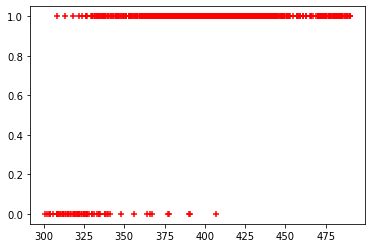

In [10]:
plt.scatter(df2.elongation,df2.cr,marker='+',color='red')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df2[['elongation']],df2.cr,test_size=0.3)

In [12]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [13]:
model.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [14]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'), y_train)

C:\Users\AnggiDast\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({1: 613, 0: 61})
After SMOTE:  Counter({1: 613, 0: 613})


In [16]:
model.fit(X_train_smote, y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test, y_predict))
pd.crosstab(y_test, y_predict)

0.8931034482758621


col_0,0,1
cr,,
0,20,0
1,31,239


In [17]:
print(y_predict)

[1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


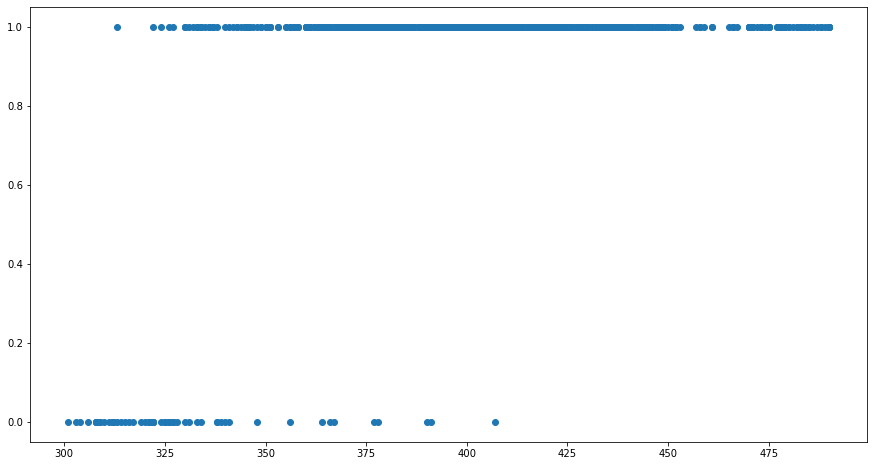

In [18]:
plt.figure(figsize=(15,8))
plt.scatter(X_train, y_train)
#plt.plot(X_train, model.predict(X_train), color = 'red')
#plt.title('Elongation to Bursting (Train Set)')
#plt.xlabel("Elongation at Break")
#plt.ylabel("Bursting Pressure")
plt.show()

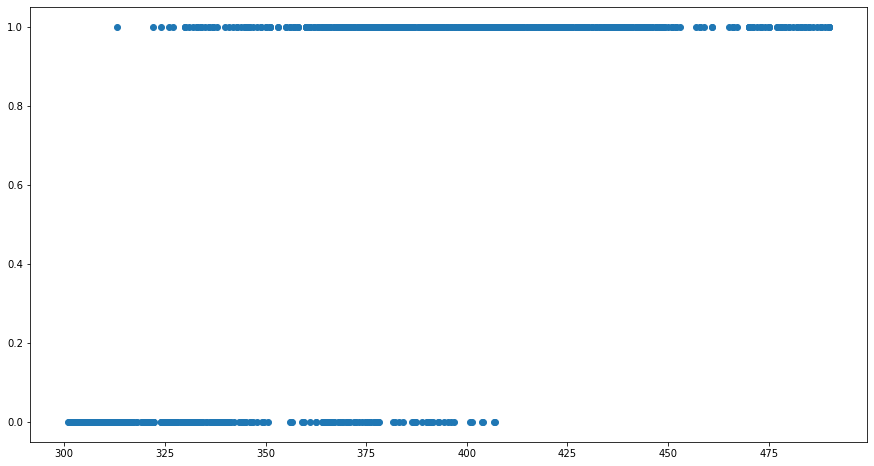

In [19]:
plt.figure(figsize=(15,8))
plt.scatter(X_train_smote, y_train_smote)
#plt.plot(X_train, model.predict(X_train), color = 'red')
#plt.title('Elongation to Bursting (Train Set)')
#plt.xlabel("Elongation at Break")
#plt.ylabel("Bursting Pressure")
plt.show()

In [20]:
target = 'cr'

1    883
0     81
Name: cr, dtype: int64


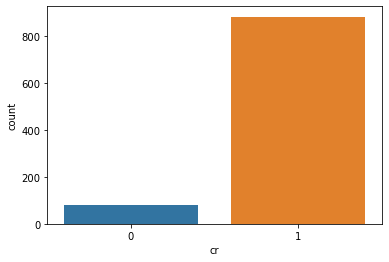

In [21]:
ax = sns.countplot(x=target, data=df2)
print(df2[target].value_counts())

In [22]:
y_pred = model.predict(X_train_smote)

In [23]:
#Accuracy score
print("The Training (Before SMOTE) Accuracy is: ", model.score(X_train, y_train))
print("The Training (After SMOTE) Accuracy is: ", model.score(X_train_smote, y_train_smote))
print("The Testing Accuracy is: ", model.score(X_test, y_test))

#Classification report
print(classification_report(y_train_smote, y_pred))

The Training (Before SMOTE) Accuracy is:  0.8902077151335311
The Training (After SMOTE) Accuracy is:  0.8874388254486134
The Testing Accuracy is:  0.8931034482758621
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       613
           1       0.88      0.89      0.89       613

    accuracy                           0.89      1226
   macro avg       0.89      0.89      0.89      1226
weighted avg       0.89      0.89      0.89      1226



In [24]:
#Confusion matrix
def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True value')
    plt.xlabel('Predicted value')

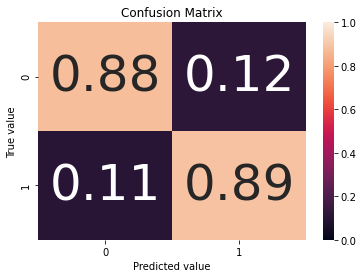

In [25]:
#Visualize cm
cm = confusion_matrix(y_train_smote, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
cm

plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion Matrix')

In [26]:
model.classes_

array([0, 1])

In [30]:
cm.sum(axis=0)

array([607, 619], dtype=int64)

In [33]:
cm.sum(axis=1)

array([613, 613], dtype=int64)

In [32]:
#True value of cm
cm_norm

array([[0.88254486, 0.11745514],
       [0.10766721, 0.89233279]])

In [29]:
cm

array([[541,  72],
       [ 66, 547]], dtype=int64)

In [28]:
np.diag(cm)

array([541, 547], dtype=int64)

In [34]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.88254486 0.89233279]
The Precision is: [0.89126853 0.88368336]
The False positive rate is: [0.10766721 0.11745514]
The False Negative Rate is:  [0.11745514 0.10766721]

The average TPR is: 0.8874388254486134
The average Precision is: 0.8874759470155669
The average False positive rate is: 0.11256117455138662
The average False Negative Rate is: 0.11256117455138662


In [36]:
pred_proba = model.predict_proba(X_train_smote)
model.coef_

array([[0.07277362]])

In [39]:
# Running Log loss on training
print("The Log Loss on Training Dataset is: ", log_loss(y_train_smote, pred_proba))

# Running Log loss on testing
pred_proba_t = model.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training Dataset is:  0.25923341915081155
The Log Loss on Testing Dataset is:  0.24207396572183512


In [41]:
np.geomspace(1e-5, 1e5, num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

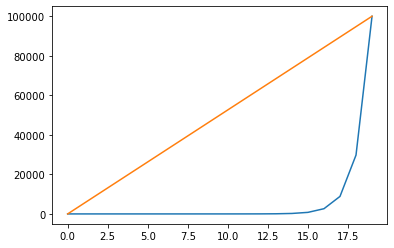

In [42]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [60]:
# Looping over the parameters
C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []


for c in C_List:
    model2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    model2.fit(X_train_smote, y_train_smote)
    #X_test2 = np.array(X_test).reshape(-1, 1)
    #y_test2 = np.array(y_test).reshape(-1, 1)
    score = model2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = model2.predict_proba(X_test)
    log_loss2 = log_loss(y_test2, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

ValueError: Found input variables with inconsistent numbers of samples: [290, 300]

In [62]:
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
model3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
model3.fit(X_train_smote, y_train_smote)
print("The CA is:", model3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)

ValueError: Expected 2D array, got 1D array instead:
array=[-5.         -4.94983278 -4.89966555 -4.84949833 -4.7993311  -4.74916388
 -4.69899666 -4.64882943 -4.59866221 -4.54849498 -4.49832776 -4.44816054
 -4.39799331 -4.34782609 -4.29765886 -4.24749164 -4.19732441 -4.14715719
 -4.09698997 -4.04682274 -3.99665552 -3.94648829 -3.89632107 -3.84615385
 -3.79598662 -3.7458194  -3.69565217 -3.64548495 -3.59531773 -3.5451505
 -3.49498328 -3.44481605 -3.39464883 -3.34448161 -3.29431438 -3.24414716
 -3.19397993 -3.14381271 -3.09364548 -3.04347826 -2.99331104 -2.94314381
 -2.89297659 -2.84280936 -2.79264214 -2.74247492 -2.69230769 -2.64214047
 -2.59197324 -2.54180602 -2.4916388  -2.44147157 -2.39130435 -2.34113712
 -2.2909699  -2.24080268 -2.19063545 -2.14046823 -2.090301   -2.04013378
 -1.98996656 -1.93979933 -1.88963211 -1.83946488 -1.78929766 -1.73913043
 -1.68896321 -1.63879599 -1.58862876 -1.53846154 -1.48829431 -1.43812709
 -1.38795987 -1.33779264 -1.28762542 -1.23745819 -1.18729097 -1.13712375
 -1.08695652 -1.0367893  -0.98662207 -0.93645485 -0.88628763 -0.8361204
 -0.78595318 -0.73578595 -0.68561873 -0.63545151 -0.58528428 -0.53511706
 -0.48494983 -0.43478261 -0.38461538 -0.33444816 -0.28428094 -0.23411371
 -0.18394649 -0.13377926 -0.08361204 -0.03344482  0.01672241  0.06688963
  0.11705686  0.16722408  0.2173913   0.26755853  0.31772575  0.36789298
  0.4180602   0.46822742  0.51839465  0.56856187  0.6187291   0.66889632
  0.71906355  0.76923077  0.81939799  0.86956522  0.91973244  0.96989967
  1.02006689  1.07023411  1.12040134  1.17056856  1.22073579  1.27090301
  1.32107023  1.37123746  1.42140468  1.47157191  1.52173913  1.57190635
  1.62207358  1.6722408   1.72240803  1.77257525  1.82274247  1.8729097
  1.92307692  1.97324415  2.02341137  2.0735786   2.12374582  2.17391304
  2.22408027  2.27424749  2.32441472  2.37458194  2.42474916  2.47491639
  2.52508361  2.57525084  2.62541806  2.67558528  2.72575251  2.77591973
  2.82608696  2.87625418  2.9264214   2.97658863  3.02675585  3.07692308
  3.1270903   3.17725753  3.22742475  3.27759197  3.3277592   3.37792642
  3.42809365  3.47826087  3.52842809  3.57859532  3.62876254  3.67892977
  3.72909699  3.77926421  3.82943144  3.87959866  3.92976589  3.97993311
  4.03010033  4.08026756  4.13043478  4.18060201  4.23076923  4.28093645
  4.33110368  4.3812709   4.43143813  4.48160535  4.53177258  4.5819398
  4.63210702  4.68227425  4.73244147  4.7826087   4.83277592  4.88294314
  4.93311037  4.98327759  5.03344482  5.08361204  5.13377926  5.18394649
  5.23411371  5.28428094  5.33444816  5.38461538  5.43478261  5.48494983
  5.53511706  5.58528428  5.63545151  5.68561873  5.73578595  5.78595318
  5.8361204   5.88628763  5.93645485  5.98662207  6.0367893   6.08695652
  6.13712375  6.18729097  6.23745819  6.28762542  6.33779264  6.38795987
  6.43812709  6.48829431  6.53846154  6.58862876  6.63879599  6.68896321
  6.73913043  6.78929766  6.83946488  6.88963211  6.93979933  6.98996656
  7.04013378  7.090301    7.14046823  7.19063545  7.24080268  7.2909699
  7.34113712  7.39130435  7.44147157  7.4916388   7.54180602  7.59197324
  7.64214047  7.69230769  7.74247492  7.79264214  7.84280936  7.89297659
  7.94314381  7.99331104  8.04347826  8.09364548  8.14381271  8.19397993
  8.24414716  8.29431438  8.34448161  8.39464883  8.44481605  8.49498328
  8.5451505   8.59531773  8.64548495  8.69565217  8.7458194   8.79598662
  8.84615385  8.89632107  8.94648829  8.99665552  9.04682274  9.09698997
  9.14715719  9.19732441  9.24749164  9.29765886  9.34782609  9.39799331
  9.44816054  9.49832776  9.54849498  9.59866221  9.64882943  9.69899666
  9.74916388  9.7993311   9.84949833  9.89966555  9.94983278 10.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

NameError: name 'expit' is not defined

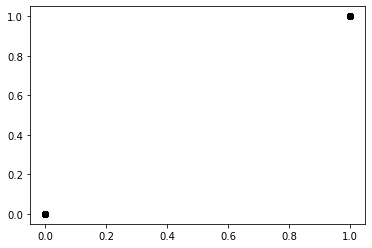

In [40]:
#plt.figure(1, figsize=(4, 3))
#plt.model()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * model.coef_ + model.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

#ols = linear_model.LinearRegression()
#ols.fit(X, y)
#plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
#plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()